<a href="https://colab.research.google.com/github/vishnu-priya007/ML_Project/blob/main/ML_PROJECT_weatherAUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rain in Australia Analysis**

**Content**

This dataset comprises about 10 years (Dec 2008 - June 2017)of daily weather observations from numerous locations across Australia.

**Objective**

The objective is to predict RainTomorrow('Yes' if the rain for that day)based on various weather attributes.

The goal is to predict the model that can identify the rain


**Data Overview:**

Attributes                   Description


Date :                      The day the weather was recorded

Location :                  The name of the place where the weather was recorded

MinTemp :                  The lowest temperature on that day (in °C)

MaxTemp :      	           The highest temperature on that day (in °C)

Rainfall  :                 How much it rained during the day (in mm)

Evaporation  :              How much water evaporated into the air (in mm)

Sunshine :                  How many hours the sun was shining

WindGustDir   :             The direction from which the strongest wind came

WindGustSpeed :             How fast the strongest wind was (in km/h)

WindDir9am  :               Wind direction at 9 in the morning

WindDir3pm:               Wind direction at 3 in the afternoon

WindSpeed9am	 :            Wind speed at 9 in the morning

WindSpeed3pm	:             Wind speed at 3 in the afternoon

Humidity9am	 :              How humid (wet) the air was at 9am (in %)

Humidity3pm	 :              Humidity at 3pm

Pressure9am	:               Air pressure at 9am (measured in hPa)

Pressure3pm	:              Air pressure at 3pm

Cloud9am	:                 How cloudy the sky was at 9am
                           (0 = clear, 8 = fully  cloudy)
                         
Cloud3pm	:                 Cloud cover at 3pm

Temp9am	 :                  Temperature at 9am

Temp3pm	 :                 Temperature at 3pm

RainToday	:                 Did it rain today? (Yes or No)

RainTomorrow	:             To predict Will it rain tomorrow?

**LOAD DATASET:**

In [67]:
#Import Libraries
#*Load the Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/weatherAUS.csv')


In [68]:
# See first five rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [132]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145453,2017-06-19,33,7.4,20.6,0.0,4.8,8.4,0,35.0,8,...,63.0,33.0,1027.2,1023.3,5.0,5.0,11.0,20.3,0,0
145454,2017-06-20,33,3.5,21.8,0.0,4.8,8.4,0,31.0,8,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,2017-06-21,33,2.8,23.4,0.0,4.8,8.4,0,31.0,15,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,2017-06-22,33,3.6,25.3,0.0,4.8,8.4,12,22.0,15,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,2017-06-23,33,5.4,26.9,0.0,4.8,8.4,9,37.0,15,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


In [69]:
# Check data types & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [70]:
# # Summary stats of numerical features
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Count: This tells us how many days had data recorded for that column.

Mean: This is the average number.It tells the temperature or rainfall amount.

Min and Max: The smallest and biggest values recorded ,It can  coldest and hottest temperature.

25%, 50%, 75%: These numbers split the data into quarters, telling us how values are spread out.

In [71]:
df.shape# 145460 rows and 23 columns

(145460, 23)

**DATA PREPROCESSING**

  Making raw data clean and making data in usable format by checking null values


**DATA CLEANING**

In [72]:
#1.2.	Handle Missing Values: Check for and handle any missing values in the dataset if present
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [73]:
## List of all columns
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [74]:
df['Date'].unique()

array(['01-12-2008', '02-12-2008', '03-12-2008', ..., '29-01-2008',
       '30-01-2008', '31-01-2008'], dtype=object)

In [75]:
#Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [76]:
df['Date'].unique()

<DatetimeArray>
['2008-12-01 00:00:00', '2008-12-02 00:00:00', '2008-12-03 00:00:00',
 '2008-12-04 00:00:00', '2008-12-05 00:00:00', '2008-12-06 00:00:00',
 '2008-12-07 00:00:00', '2008-12-08 00:00:00', '2008-12-09 00:00:00',
 '2008-12-10 00:00:00',
 ...
 '2008-01-22 00:00:00', '2008-01-23 00:00:00', '2008-01-24 00:00:00',
 '2008-01-25 00:00:00', '2008-01-26 00:00:00', '2008-01-27 00:00:00',
 '2008-01-28 00:00:00', '2008-01-29 00:00:00', '2008-01-30 00:00:00',
 '2008-01-31 00:00:00']
Length: 3436, dtype: datetime64[ns]

**Imputing missising values for  numerical_cols and categorical_cols**

In [77]:
from sklearn.impute import SimpleImputer

# Select numerical columns from dataset
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create and apply median imputer
num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

median is good imputer,It won't  affected by extreme values.

 data more realistic without adding bias from very high or low numbers.



In [78]:
#categorical_cols
categorical_cols = df.select_dtypes(include='object').columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

Ensures the dataset contains no missing values in categorical columns

 by imputing them with the mode, preserving the distribution of categories without  bias in values.

To see Numerical and Categorical columns

In [79]:
numerical_cols

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [80]:
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [81]:
#unique values of categorical columns before Label Encoder
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday: ['No' 'Yes']
RainTomorrow: ['No' 'Yes']


Location:
Names of different places where the weather was recorded, like Albury, Sydney, Brisbane, Perth, and many more.

WindGustDir:
The direction from which the strongest wind blew during the day, like West (W), North-West (NW), East (E), South (S), etc.

WindDir9am:
The wind direction at 9 in the morning.

WindDir3pm:
The wind direction at 3 in the afternoon.

RainToday:
Whether it rained today or not.  either “Yes” or “No”.

RainTomorrow:
To predict — will it rain tomorrow?  “Yes” or “No”.

**categorical_cols after LabelEncoder**

In [82]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [83]:
#unique values of categorical columns
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Location: [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
WindGustDir: [13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]
WindDir9am: [13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]
WindDir3pm: [14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]
RainToday: [0 1]
RainTomorrow: [0 1]


**TO SEE MISSING VALUES**

In [84]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


**TO SEE TARGET COLUMN UNIQUE**

In [85]:
df['RainTomorrow'].unique()

array([0, 1])

INCONSISTENCIES

In [86]:
#  get categorical columns
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [87]:
#  standardize all strings: strip spaces, lower case
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

**Remove Outliers Using IQR Method**

Apply to All Numerical Columns

BEFORE REMOVING OUTLIERS USING BOX PLOT

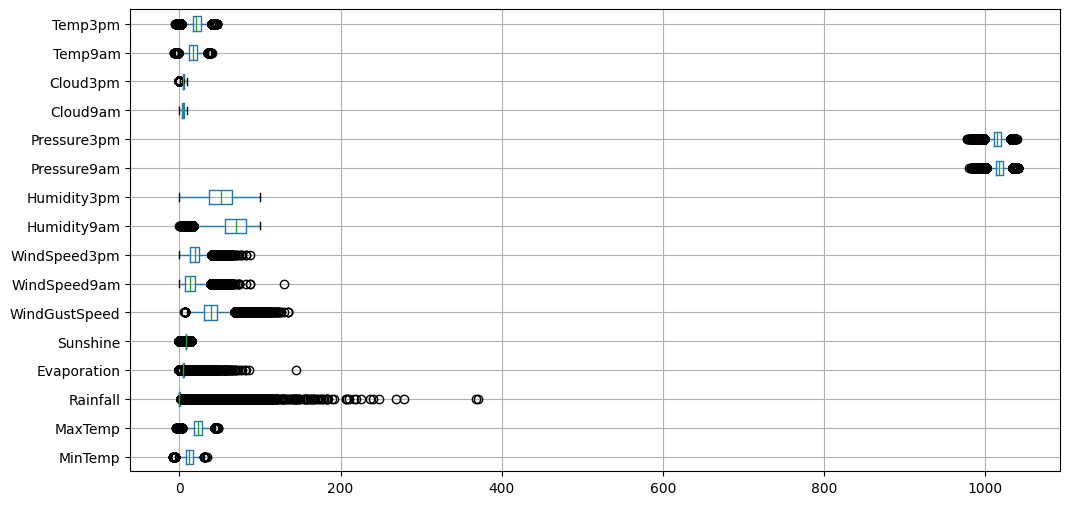

In [89]:
df.boxplot(column=numerical_cols.tolist(), vert=False, figsize=(12, 6))
plt.show()

For pressure, the numbers are usually high and close together.

For rainfall and evaporation, some days have much more than usual, shown by lots of dots far away from the box.

Temperatures usually stay between about -10°C and 40°C.

Sunshine is mostly low but can vary a bit.

In [90]:
df.shape# original shape

(145460, 23)

**Outliers**

Outliers are values that are **very different from most of the other data**.

They are either much **higher or much lower than the usual range**.

Outliers stand out because they **don't follow the normal pattern**.

**BOX PLOT BEFORE OUTLIERS**

In [91]:
for column in numerical_cols:
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  df=df[(df[column]>=Q1-1.5*IQR) *(df[column]<=Q3+1.5*IQR)]

In [92]:
df.shape# After removing outliers

(29231, 23)

**AFTER REMOVING OUTLIERS USING BOX PLOT**

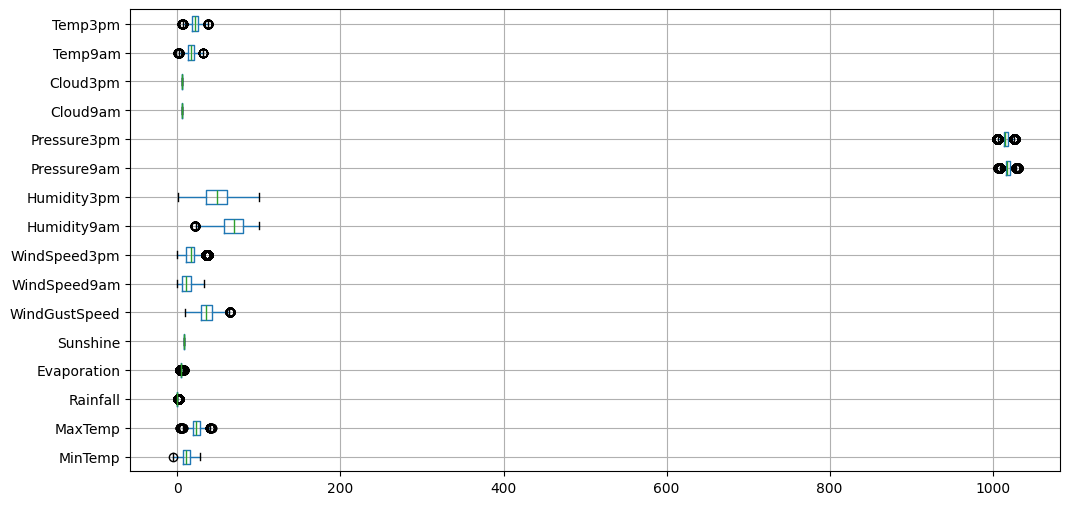

In [93]:
df.boxplot(column=numerical_cols.tolist(), vert=False, figsize=(12, 6))
plt.show()

By comparing with before box plot,there is less or no outliers (the dots outside the boxes are mostly gone).

This means the data has been cleaned or adjusted to remove extreme values.

The ranges look more compact

**Check for Duplicates**

In [94]:
df.duplicated().sum()
df = df.drop_duplicates()

**Verify Target Column**

In [95]:
print(df['RainTomorrow'].value_counts())

RainTomorrow
0    25416
1     3815
Name: count, dtype: int64


 Final Dataset Shape

In [96]:
df.shape


(29231, 23)

In [97]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
7,2008-12-08,2,7.7,26.7,0.0,4.8,8.4,13,35.0,10,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
9,2008-12-10,2,13.1,30.1,1.4,4.8,8.4,13,28.0,8,...,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0
10,2008-12-11,2,13.4,30.4,0.0,4.8,8.4,3,30.0,10,...,48.0,22.0,1011.8,1008.7,5.0,5.0,20.4,28.8,0,1


**SKEWNESS**

If the data is symmetrical (balanced), skew is close to 0.

If the data has a long tail to the right (more big values) = positive skew.

If the data has a long tail to the left (more small values) = negative skew.

In [98]:
#Skew
skew_values = df[numerical_cols].skew().sort_values(ascending=False)
print(skew_values)

Rainfall         3.430207
Evaporation      2.464372
WindSpeed9am     0.438839
WindSpeed3pm     0.335950
Pressure9am      0.258810
Pressure3pm      0.205389
Humidity3pm      0.192550
WindGustSpeed    0.182834
Temp3pm          0.179550
MaxTemp          0.147365
Cloud3pm         0.000000
Sunshine         0.000000
Cloud9am         0.000000
MinTemp         -0.083631
Humidity9am     -0.140831
Temp9am         -0.168354
dtype: float64


In [99]:
# Identify highly skewed features
highly_skewed = skew_values[abs(skew_values) > 1]
print("Highly skewed features:\n", highly_skewed)

Highly skewed features:
 Rainfall       3.430207
Evaporation    2.464372
dtype: float64


SKEWNESS more in rainfall

**DATA VISUALIZATIONS**

**UNIVARIATE ANALYSIS**

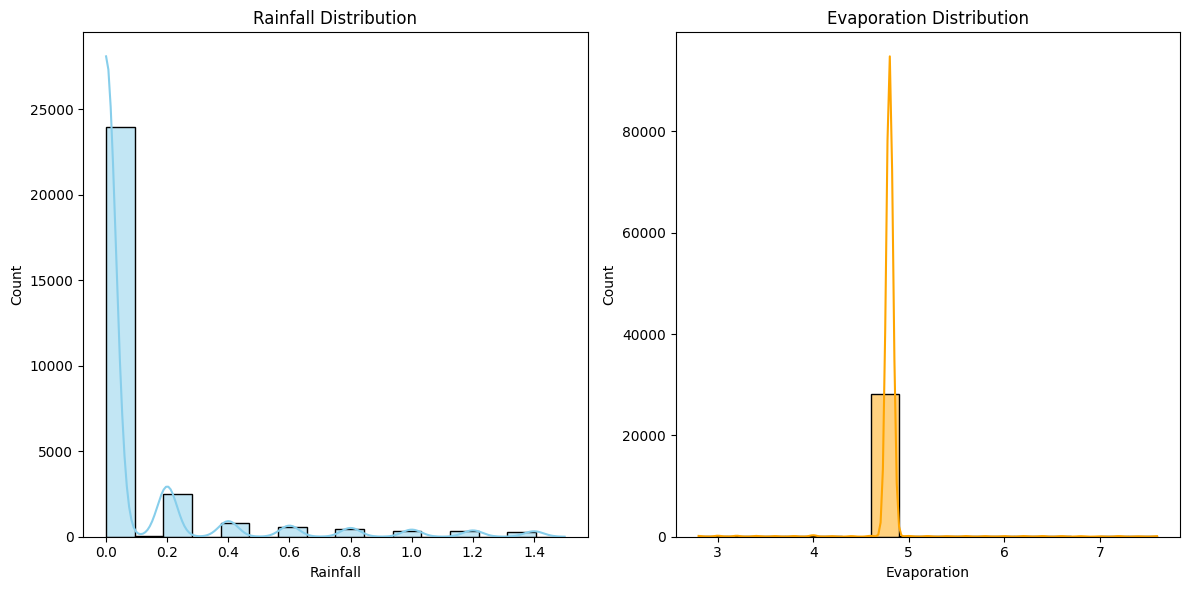

In [100]:
#plot histograms or density plots to visually assess skewness:
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Rainfall
sns.histplot(df['Rainfall'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Rainfall Distribution')

# Evaporation
sns.histplot(df['Evaporation'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Evaporation Distribution')

plt.tight_layout()
plt.show()

In Rainfall,tall bar near 0 ,so there is no rain

values are tightly grouped around 5 ,evaporation doesn't vary much.
There's a sharp peak in the middle, most days have evaporation rates.

**LOG TRANSFORMATIONS:**

In [101]:
# Use log1p to safely handle zero values
df['Rainfall_log'] = np.log1p(df['Rainfall'])
df['Evaporation_log'] = np.log1p(df['Evaporation'])


In [102]:
df['Rainfall'] = df['Rainfall_log']
df['Evaporation'] = df['Evaporation']

In [103]:
df['Rainfall'].skew()

np.float64(2.9549241394263186)

In [104]:
df['Evaporation'].skew()

np.float64(2.4643719031601434)

In [105]:
df.drop(columns=['Rainfall_log','Evaporation_log'],inplace=True)

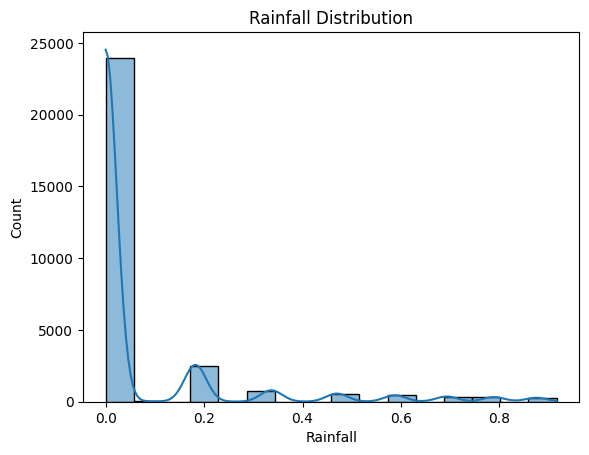

In [106]:
#plot histograms or density plots to visually assess skewness:
sns.histplot(df['Rainfall'], kde=True)
plt.title('Rainfall Distribution')
plt.show()

Right-Skewed Data Improved:

Most days have no rain or very little rain


**BIVARIATE ANALYSIS**

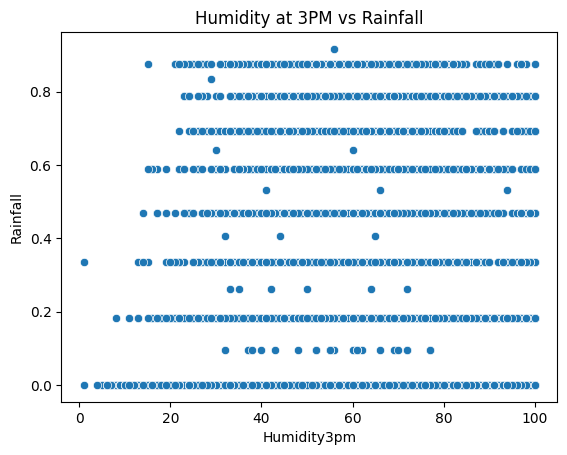

In [107]:
#Numerical vs Numerical
sns.scatterplot(x='Humidity3pm', y='Rainfall', data=df)
plt.title('Humidity at 3PM vs Rainfall')
plt.xlabel('Humidity3pm')
plt.ylabel('Rainfall')
plt.show()

When humidity is low, there is almost no rainfall.

As humidity at 3 PM increases, rainfall becomes more likely.

So, conclusion by this graph, higher humidity at 3 PM often leads to more rain.

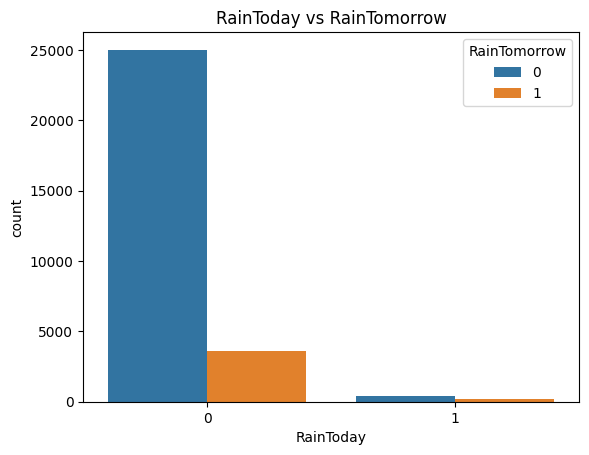

In [108]:
#Categorical vs Categorical


sns.countplot(x='RainToday', hue='RainTomorrow', data=df)
plt.title('RainToday vs RainTomorrow')
plt.show()

On most days when it did not rain today (0), it also didn't rain tomorrow (blue bar is high).

If it rained today, there is a higher chance it will rain tomorrow.
But most days, it doesn't rain both today and tomorrow.

RainToday and Rain Tomorrow are seems to be same(i.e, If Rains today then Rains tomorrow, If No Rains today then No Rains tomorrow)

**MULTIVARIATE ANALYSIS**

In [109]:
df[['Cloud9am', 'Sunshine']].isnull().sum()

,0
Cloud9am,0
Sunshine,0


In [110]:
df[['Cloud9am', 'Sunshine']].dtypes

,0
Cloud9am,float64
Sunshine,float64


In [111]:
df['Sunshine'].nunique()

1

In [112]:
df['Cloud9am'].nunique()

1

In [113]:
df['Cloud3pm'].nunique()

1

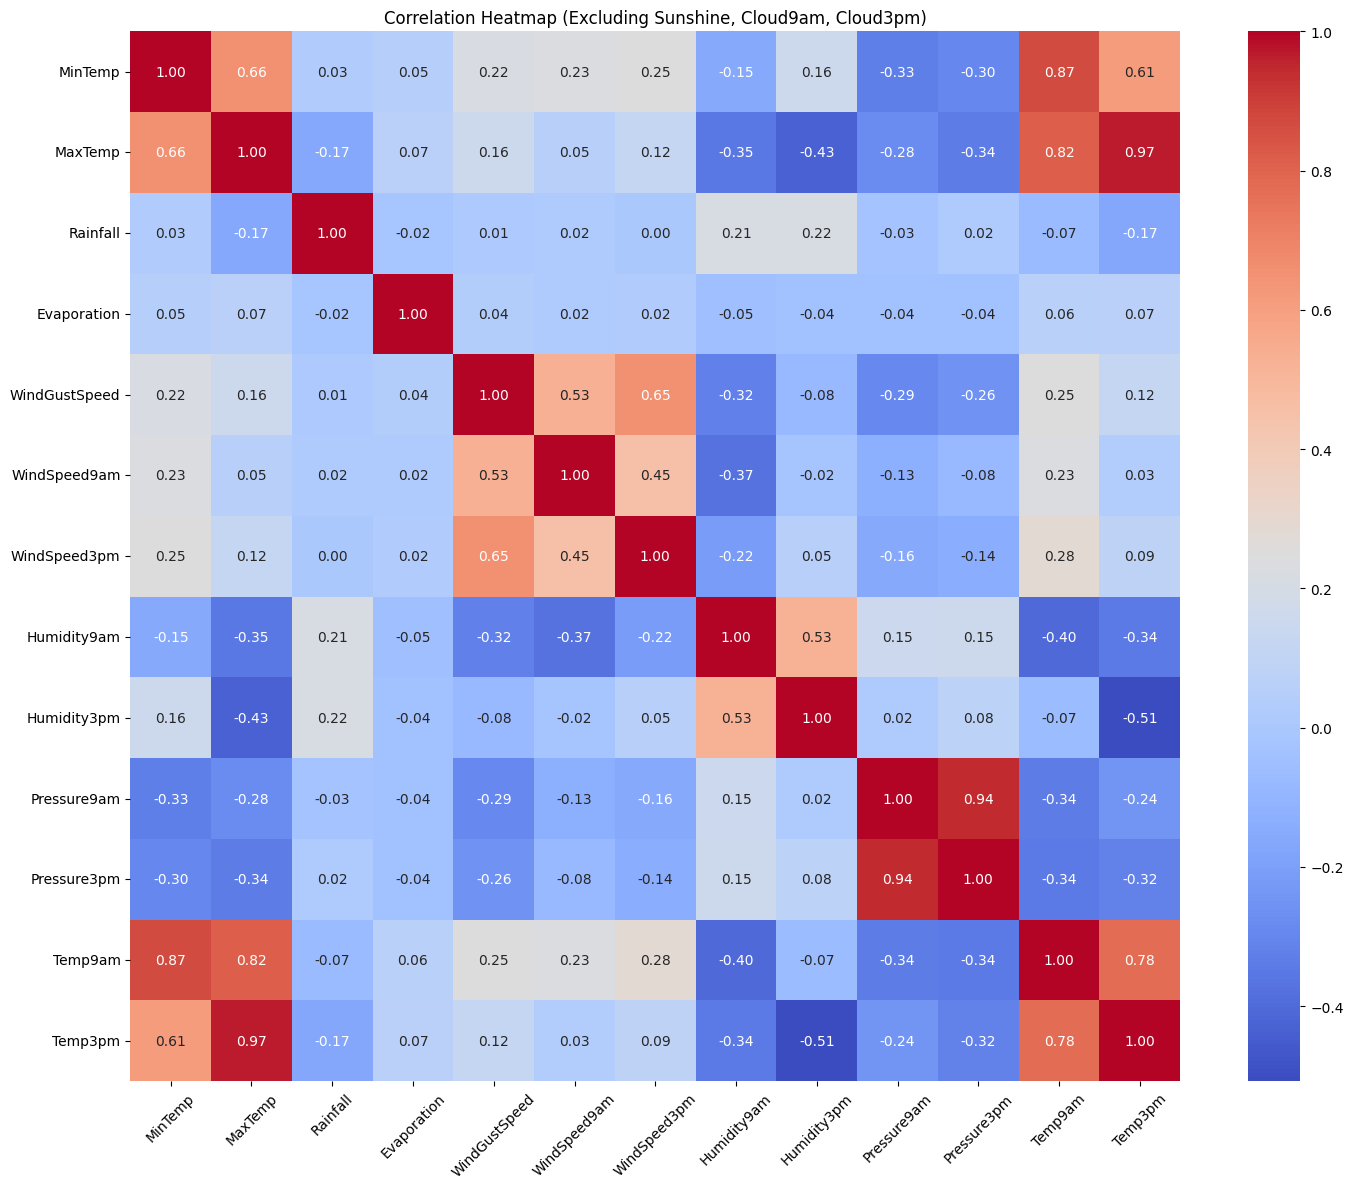

In [114]:
# Drop problematic columns before computing correlation
excluded_columns = ['Sunshine', 'Cloud9am', 'Cloud3pm']
numerical_df = df.drop(columns=excluded_columns, errors='ignore')

# Ensure only numerical columns are selected
numerical_df = numerical_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap (Excluding Sunshine, Cloud9am, Cloud3pm)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

 Strong Positive Correlations:
MaxTemp & Temp3pm: 0.97 — Temperature is maximum in afternoon

Pressure9am & Pressure3pm: 0.94 — Consistent atmospheric pressure during the day.

MinTemp & Temp9am: 0.87 — Morning temperature and  minimum temperature are closely related.

**Feature Selection and Model Building (using multiple models)**

In [115]:
categorical_cols

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [116]:
from sklearn.preprocessing import LabelEncoder

label_encoder={}

for col in categorical_cols:

  le = LabelEncoder()

for col in categorical_cols:

    df[col] = le.fit_transform(df[col])

    label_encoder[col]=le

**FEATURE SELECTION**

In [117]:
x=df.drop(columns=['Date','RainTomorrow'])
y=df['RainTomorrow']

In [118]:
df['RainTomorrow'].unique()

array([0, 1])

In [119]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [120]:
#feature selectiom method
from sklearn.feature_selection import SelectKBest,f_classif
k=10
selector=SelectKBest(score_func=f_classif,k=k)
selector.fit(x,y)


SelectKBest()

In [121]:
#To get the selected features names
selected_features=selector.fit_transform(x,y)


In [122]:
#To see the selected features scores
scores=selector.scores_

In [123]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [124]:
#To see feature and its score in decending
feature_score=pd.DataFrame({f'feature':x.columns,'score':scores}).sort_values(by='score',ascending=False)
feature_score

,feature,score
13,Humidity3pm,3642.615652
12,Humidity9am,793.350953
3,Rainfall,611.832885
19,Temp3pm,564.673423
15,Pressure3pm,406.655004
14,Pressure9am,381.376572
7,WindGustSpeed,360.092688
2,MaxTemp,333.747957
1,MinTemp,196.442785
20,RainToday,162.601647


Afternoon humidity (Humidity3pm) tells the most about rain tomorrow

Yes, higher humidity generally increases the chance of rainfall.

In [125]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

**Scaling Transformations**

In [126]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[numerical_cols]=scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols]=scaler.transform(x_test[numerical_cols])


**CLASSIFICATION MODELS:**

In [127]:
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

classifiers = {

'logistic_regression' : LogisticRegression(),

'K_Nearest Neighbors' : KNeighborsClassifier(),

'DecisionTree' : DecisionTreeClassifier(),

'Randomforest' : RandomForestClassifier(),

'Support vector classifier' : SVC(),

'Naive Bayes' : GaussianNB(),

'XgBoost' : XGBClassifier()

}


In [128]:
x_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
25739,22,-1.113234,-0.060769,0.656490,-0.012629,0.0,9,-1.635936,9,10,...,-1.269376,1.815687,-0.299989,-0.256182,-0.200785,0.0,0.0,-1.230531,0.075458,0
111857,37,-0.298364,-1.221666,-0.390223,-0.012629,0.0,7,1.562981,11,9,...,1.004555,-0.247554,0.567423,-0.634572,-1.561135,0.0,0.0,-0.991453,-1.023859,0
29634,26,0.707219,1.083304,-0.390223,-0.012629,0.0,1,-0.569630,9,8,...,-1.403137,-0.070705,-0.299989,-0.501023,-0.948977,0.0,0.0,0.939558,1.314371,0
112671,37,0.343129,1.302023,-0.390223,-0.012629,0.0,14,0.108928,0,2,...,1.004555,-1.249699,-0.191563,-0.456506,-0.382165,0.0,0.0,1.325761,0.878134,0
125575,28,0.984622,0.982356,-0.390223,-0.012629,0.0,14,1.175234,4,3,...,1.004555,-1.662347,-1.167401,-0.256182,-0.200785,0.0,0.0,1.178636,0.947932,0


**Label Encoder**

In [129]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**Evaluation Metrics**

In [130]:
results = {}
from sklearn.metrics import accuracy_score,f1_score

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {'Accuracy': acc,'F1 Score': f1 }

results_df = pd.DataFrame(results).T
print(results_df)


                           Accuracy  F1 Score
logistic_regression        0.884151  0.318121
K_Nearest Neighbors        0.870924  0.208392
DecisionTree               0.826568  0.354688
Randomforest               0.888597  0.348232
Support vector classifier  0.870810  0.000000
Naive Bayes                0.855302  0.349564
XgBoost                    0.887343  0.422222


**CONCLUSION:**

 **XGBoost** **is the best model** — strong at both accuracy(88.7%) and
  F1 Score(0.422222) **for getting rain tomorrow.**

 Random Forest is also good in accuracy(88.8%) but F1 Score(0.343813) slightly weaker in predicting rain.

Naive Bayes and Decision Tree accuracy is not so good in accuracy and  F1 Score.

Support Vector Classifier (SVC) is  fails at predicting rain.

Logistic Regression and KNN are not  great for this model.

In [131]:
#To see overall summary
from sklearn.metrics import precision_score,recall_score,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7637
           1       0.63      0.32      0.42      1133

    accuracy                           0.89      8770
   macro avg       0.77      0.65      0.68      8770
weighted avg       0.87      0.89      0.87      8770



By f1-score(94%), No rain most of the time.
Precision (63%) actually correct,it will rain

precision,recall and f1-score are very good at saying "no rain."



